<div align="center" style="color:Blue;font-size:18px"> Using Different Ensemble learning methods and comparing them along with baseline method</div>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving DS2_C5_S7_KCHouse_Data_Practice.csv to DS2_C5_S7_KCHouse_Data_Practice.csv


### Task1

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
#import reverse_geocoder as rg
from sklearn.model_selection import RepeatedKFold,cross_val_score

In [4]:
df=pd.read_csv("DS2_C5_S7_KCHouse_Data_Practice.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21613, 21)

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
#There are no null values in our dataset
#all are in float/int so no need of label encoding also

In [10]:
#lets delete unwanted columns

In [5]:
df.drop(["id","date",'yr_built','yr_renovated','zipcode','lat','long'],axis=1,inplace=True)

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503


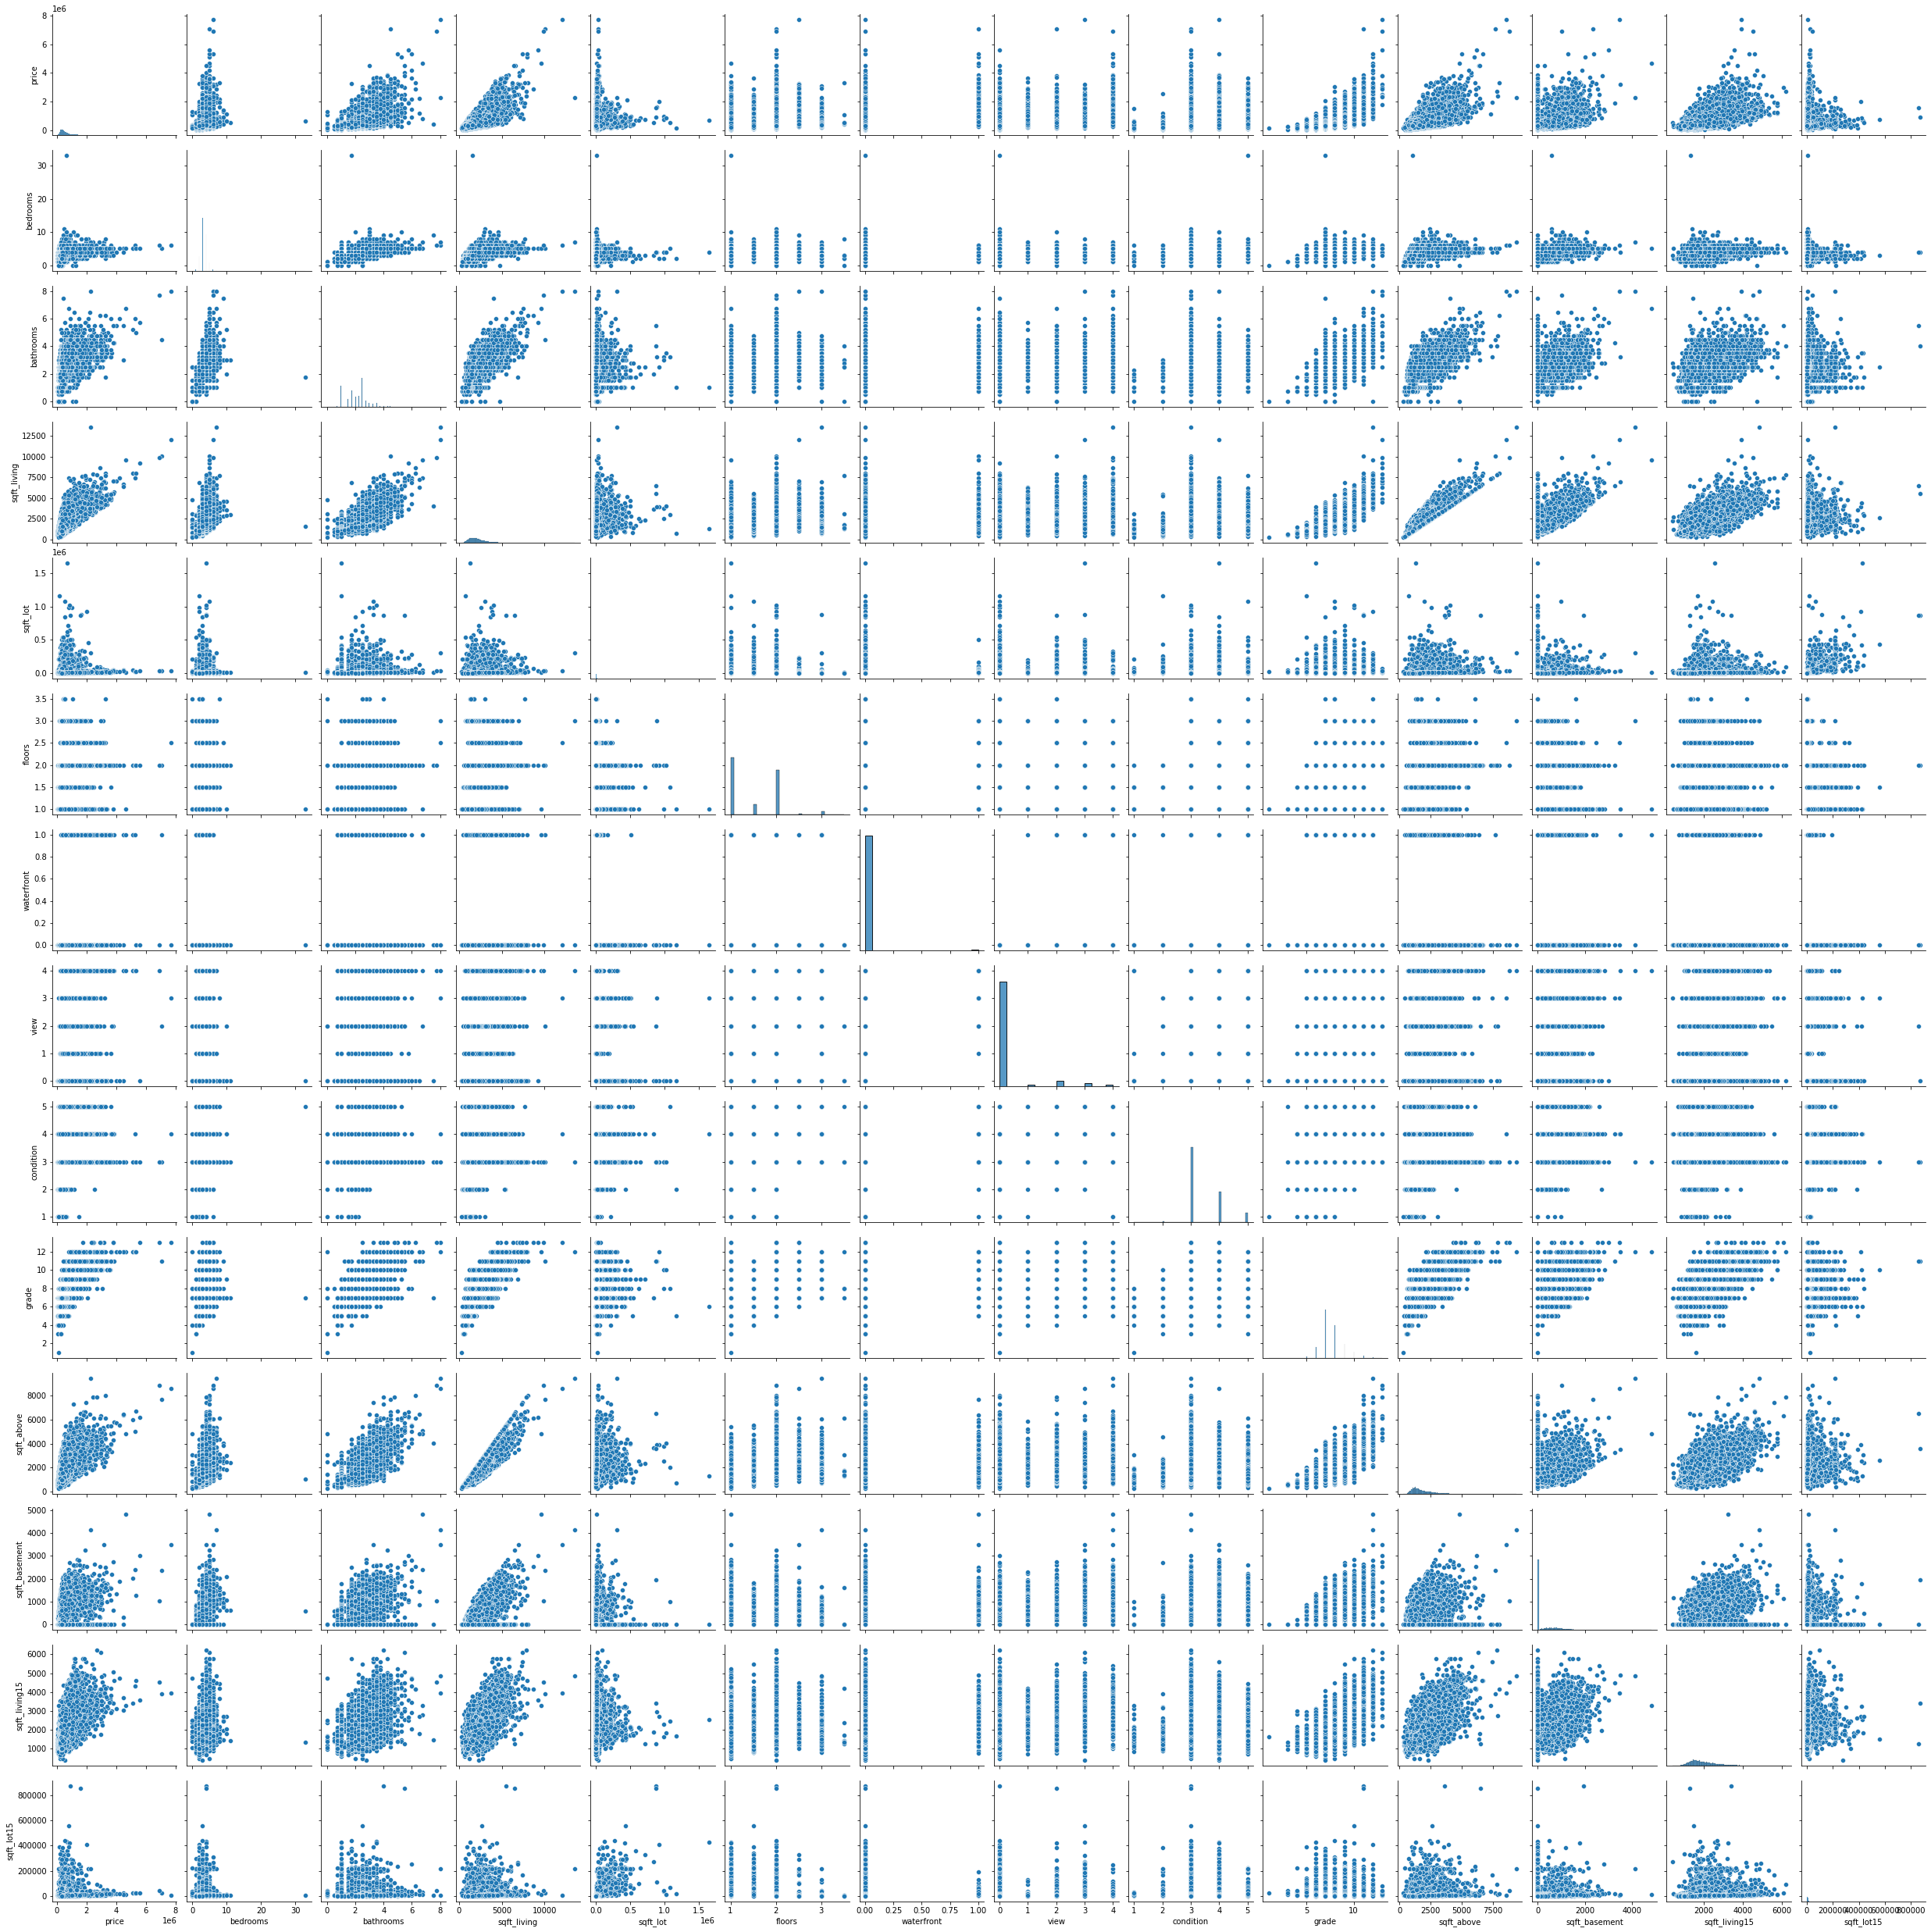

In [13]:
#visualizing all continuous data
sns.pairplot(df)

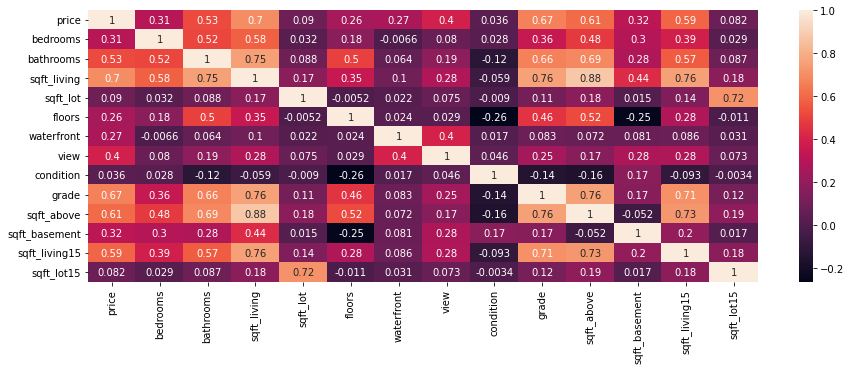

In [14]:
#correlation matrix
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

In [15]:
# price is our target variable. and wrt price we can see sqft_living,grade,sqft_above are highly correlated

In [6]:
#standard scaling
df1=df.loc[:,df.columns!="price"]
scaler=StandardScaler()
y=df["price"]
df=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df["price"]=y

In [17]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [7]:
#separating features and target
x=df.iloc[:,:-1]
y=df["price"]

In [8]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Task2: Base Line model: Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()

In [22]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [23]:
score1=cross_val_score(model,x,y,cv=cv,scoring="r2")

In [24]:
#R^2 of linear regression
score1.mean()

0.6039707092286963

### Task3 : Bagging : Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model=RandomForestRegressor()

In [27]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [28]:
score2=cross_val_score(model,x,y,cv=cv,scoring="r2",n_jobs=-1)

In [29]:
#R^2 of random forest regressor
score2.mean()

0.718244623126885

### Task4: Boosting :Adaptive Boosting

In [30]:
from sklearn.ensemble import AdaBoostRegressor

In [31]:
model=AdaBoostRegressor()

In [32]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [33]:
score3=cross_val_score(model,x,y,cv=cv,scoring="r2",n_jobs=-1)

In [34]:
##R^2 of of adaboosting
score3.mean()

0.12332493959508854

### Task5 : Stacking 

Base Models:
- K Nearest Neighbours
- Decision Tree
- Support Vecotor Machine 

Meta Model:
- Linear Regressor

In [35]:
from sklearn.ensemble import StackingRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [37]:
level0=[("knn",KNeighborsRegressor()),("dtr",DecisionTreeRegressor()),("svr",SVR())]
level1=LinearRegression()

In [38]:
model=StackingRegressor(estimators=level0,final_estimator=level1,cv=5)

In [39]:
cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [40]:
score4=cross_val_score(model,x,y,scoring="r2",cv=cv,n_jobs=-1)

In [41]:
score4.mean()

0.6786142623424248

### Task6 : Comparing All models

In [ ]:
##distribution of R^2 for different folds of each models

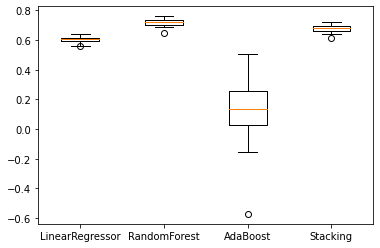

In [42]:
plt.boxplot([score1,score2,score3,score4],labels=["LinearRegressor","RandomForest","AdaBoost","Stacking"])
plt.show()

In [2]:
#Out of all model evaluations, Random Forest Regressor was the best one with higher R^2.
#So using that to build our model

In [10]:
model=RandomForestRegressor().fit(x_train,y_train)

In [12]:
#test accuracy
model.score(x_test,y_test)

0.6900908283790451

In [14]:
y_pred=model.predict(x_test)

In [15]:
#y predicted vs actual for random forest regressor
dfy=pd.DataFrame({"actual":y_test,"predicted":y_pred})
dfy.head()

,actual,predicted
735,365000.0,472107.62
2830,865000.0,929904.53
4106,1038000.0,969281.50
16218,1490000.0,1341416.40
19964,711000.0,767374.28


In [16]:
#plotting original and predicted price values

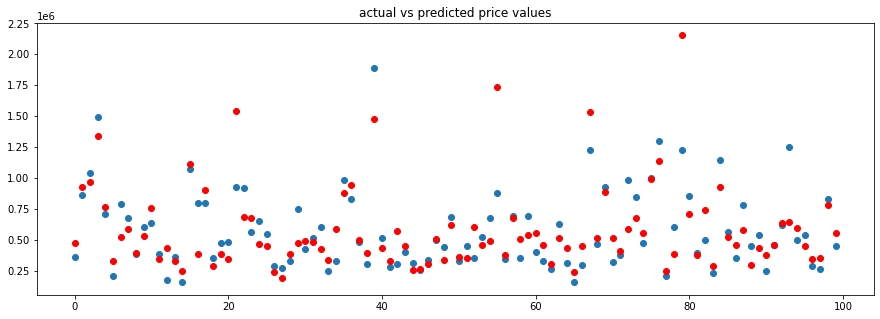

In [18]:
index=[*range(len(y_test[:100]))]
plt.figure(figsize=(15,5))
plt.title("actual vs predicted price values")
plt.scatter(index,y_test[:100])
plt.scatter(index,y_pred[:100],color="red")
plt.show()

In [ ]:
#here i have plotted on 100 samples of price for its actual value vs predicted as per random forest regressor
#Compared to all others for this dataset RF was giving good performance.But overall this is not a great model with R^2 with around 70%